In [1]:
import torch
from torchvision import datasets, transforms
from torchvision.datasets.coco import CocoDetection
from pycocotools.coco import COCO
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

from torch.utils.data import DataLoader

In [2]:
transform = transforms.Compose([
    transforms.ToTensor()
])

coco_train_dataset = datasets.CocoDetection(root='/datasets/COCO-2017/train2017', 
                                      annFile='/datasets/COCO-2017/anno2017/instances_train2017.json',
                                      transform=transform)

loading annotations into memory...
Done (t=18.48s)
creating index...
index created!


In [3]:
len(coco_train_dataset)

118287

In [14]:
coco_val_dataset = datasets.CocoDetection(root='/datasets/COCO-2017/val2017', 
                                      annFile='/datasets/COCO-2017/anno2017/instances_val2017.json',
                                      transform=transform)

loading annotations into memory...
Done (t=2.23s)
creating index...
index created!


In [15]:
len(coco_val_dataset)

5000

In [16]:
train_data_loader = DataLoader(coco_train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))


In [17]:
img, ann = coco_train_dataset[0]

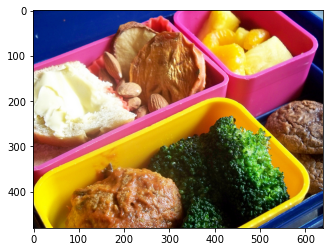

In [18]:
import matplotlib.pyplot as plt

plt.imshow(img.permute(1,2,0).numpy())
plt.show()

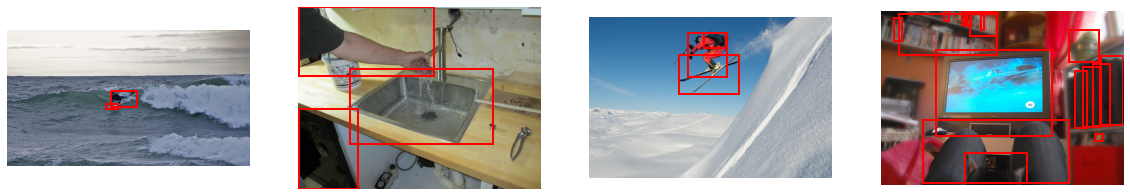

In [19]:
def show_images_with_annotations(images, annotations):
    batch_size = len(images)
    fig, axs = plt.subplots(1, batch_size, figsize=(20, 5))
    
    if batch_size == 1:
        axs = [axs]
    
    for i in range(batch_size):
        img = images[i].permute(1, 2, 0).numpy()
        axs[i].imshow(img)
        ax = axs[i]
        
        for annotation in annotations[i]:
            bbox = annotation['bbox']
            rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, color='red', linewidth=2)
            ax.add_patch(rect)
        
        ax.axis('off')
    plt.show()

# Get a batch of data
data_iter = iter(train_data_loader)
images, annotations = next(data_iter)

# Show the images with annotations
show_images_with_annotations(images, annotations)